In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [2]:
path_to_open = "..\\data\\_properties_data.json"

data = None
with open(path_to_open, "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame.from_dict(data, orient='index')

In [3]:
print(df.index)

Index(['10616910', '10616880', '10616933', '10616917', '10616913', '10616936',
       '10616926', '10616911', '10616934', '10616833',
       ...
       '10616777', '10616798', '10616788', '10616802', '10616805', '10616803',
       '10616810', '10616813', '10616831', '10616815'],
      dtype='object', length=19978)


In [4]:
print(df.shape)

(19978, 47)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19978 entries, 10616910 to 10616815
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   URL                             19978 non-null  object 
 1   Status                          19978 non-null  int64  
 2   transactionType                 19978 non-null  object 
 3   transactionSubtype              19978 non-null  object 
 4   price                           19435 non-null  float64
 5   type                            19978 non-null  object 
 6   subtype                         19978 non-null  object 
 7   country                         19978 non-null  object 
 8   region                          19978 non-null  object 
 9   province                        19978 non-null  object 
 10  district                        19978 non-null  object 
 11  locality                        19978 non-null  object 
 12  postalCode                 

In [6]:
df.head()

,URL,Status,transactionType,transactionSubtype,price,type,subtype,country,region,province,...,toiletCount,parkingCountIndoor,parkingCountOutdoor,parkingCountClosedBox,primaryEnergyConsumptionPerSqm,epcScore,hasDoubleGlazing,saleType,creationDate,lastModificationDate
10616910,https://www.immoweb.be/en/classified/10616910,200,FOR_SALE,BUY_REGULAR,399000.0,APARTMENT,APARTMENT,Belgium,Flanders,Limburg,...,1.0,1.0,1.0,None,142.0,B,True,None,2023-06-07T07:39:57.000+0000,2023-06-07T07:39:59.080+0000
10616880,https://www.immoweb.be/en/classified/10616880,200,FOR_SALE,BUY_REGULAR,218000.0,APARTMENT,APARTMENT,Belgium,Flanders,Antwerp,...,1.0,NaN,NaN,None,92.0,A,True,None,2023-06-07T07:22:33.000+0000,2023-07-05T08:30:20.607+0000
10616933,https://www.immoweb.be/en/classified/10616933,200,FOR_SALE,BUY_REGULAR,95000.0,APARTMENT,APARTMENT,Belgium,Flanders,West Flanders,...,1.0,NaN,NaN,None,521.0,F,None,None,2023-06-07T07:52:35.000+0000,2023-07-05T08:28:15.563+0000
10616917,https://www.immoweb.be/en/classified/10616917,200,FOR_SALE,BUY_REGULAR,169000.0,APARTMENT,APARTMENT,Belgium,Flanders,West Flanders,...,NaN,NaN,NaN,None,391.0,D,True,None,2023-06-07T07:47:23.000+0000,2023-07-05T08:19:08.357+0000
10616913,https://www.immoweb.be/en/classified/10616913,200,FOR_SALE,BUY_REGULAR,359000.0,APARTMENT,APARTMENT,Belgium,Flanders,Antwerp,...,NaN,NaN,NaN,None,140.0,B,False,None,2023-06-07T07:44:08.000+0000,2023-06-07T07:44:09.170+0000


In [7]:
df.isna().sum()

URL                                   0
Status                                0
transactionType                       0
transactionSubtype                    0
price                               543
type                                  0
subtype                               0
country                               0
region                                0
province                              0
district                              0
locality                              0
postalCode                            0
street                             3762
number                             4314
box                               16416
floor                             10400
latitude                           3766
longitude                          3766
bedroomCount                        515
netHabitableSurface                2805
constructionYear                   7910
facadeCount                        6058
floorCount                        14136
condition                          5741


In [80]:
data_by_postalcode = df.groupby("postalCode")["locality"].unique()
data_by_postalcode

postalCode
1000    [Brussels City, Bruxelles, BRUXELLES, Brussels...
1020    [Bruxelles, Brussels City, Brussel, Laeken, Br...
1030    [Schaerbeek, Schaerbeek - Schaarbeek, Schaarbe...
1040    [ETTERBEEK, Etterbeek, Etterbeek , Bruxelles, ...
1050    [Ixelles, Bruxelles, Ixeles, Bruxelles/Brussel...
                              ...                        
9980                                      [Sint-Laureins]
9988       [Watervliet, Sint-Laureins, Waterland-Oudeman]
9990                                           [Maldegem]
9991                                   [Adegem, Maldegem]
9992                                         [Middelburg]
Name: locality, Length: 958, dtype: object

In [6]:
data_by_postal_locality = df.groupby(["postalCode", "locality"])["locality"].count()
data_by_postal_locality

postalCode  locality     
1000        BRUXELLES        48
            BRUXELLES 1       1
            Brussel          10
            Brussels         18
            Brussels City    51
                             ..
9988        Watervliet        3
9990        Maldegem         33
9991        Adegem            6
            Maldegem          1
9992        Middelburg        3
Name: locality, Length: 2692, dtype: int64

In [7]:
data_by_type = df.groupby("type")["subtype"].count()
print(data_by_type)

type
APARTMENT          9589
APARTMENT_GROUP     401
HOUSE              9875
HOUSE_GROUP         114
Name: subtype, dtype: int64


In [8]:
df = pd.DataFrame.from_dict(data, orient='index')

df["locality"] = df["locality"].str.title()
df["locality"] = df["locality"].str.replace("^'S[ -]", "'s-", regex=True).replace(" 'S[ \-]", " 's-", regex=True)
df["locality"] = df["locality"].str.replace("©Caussinnes", "Écaussinnes").replace("Eghezee", "Eghezée")
df["locality"] = df["locality"].str.replace("©Rez©E", "Érezée").replace("(©|E)Tienne", "Étienne", regex=True)
df["locality"] = df["locality"].str.replace("[ -]St\.?[ -]", "-Saint-", regex=True)
df["locality"] = df["locality"].str.replace("[ -]Ste[ -]", "-Sainte-", regex=True)
df["locality"] = df["locality"].str.replace("Saint-Agathe", "Sainte-Agathe")
df["locality"] = df["locality"].str.replace("^St(\.)?-", "Sint-", regex=True)
df["locality"] = df["locality"].str.replace("[ ]+[0-9]+$", "", regex=True)
df["locality"] = df["locality"].str.replace("Ghent", "Gent", regex=True)
df["locality"] = df["locality"].str.replace("(Antwerpen|Anvers)(?= |$)", "Antwerp", regex=True)
df["locality"] = df["locality"].str.replace("^(Brussels( City)?|Bruxelles( Ville|/Brussel|[0-9]+)?|Brussel)$", "Brussels", regex=True)
df["locality"] = df["locality"].str.replace("^Berchem-Sainte-Agathe( - Sint-Agatha-Berchem)?$", "Sint-Agatha-Berchem", regex=True)
df["locality"] = df["locality"].str.replace(" Queue(-Du|du)-Bois", "", regex=True)
df["locality"] = df["locality"].str.replace(" \([a-zA-Z0-9\-]+\)$", "", regex=True)
df["locality"] = df["locality"].str.replace("(Aalst|Antwerp|Gent) (- )?(?!=$)", "", regex=True)
df["locality"] = df["locality"].str.replace("(?<!= )- ", "-", regex=True)
# .replace(" -(?!= )", "-", regex=True)
locality_list = list(df["locality"].drop_duplicates().sort_values())
print(type(locality_list), len(locality_list))
for locality in locality_list:
    print(locality)

<class 'list'> 1992
's-Gravenwezel
8300
Aaigem
Aalbeke
Aalst
Aalter
Aarschot
Aarschot Gelrode
Aarschot Rillaar
Aarsele
Aartrijke
Aartselaar
Aat
Achet
Achouffe
Acoz
Adegem
Adinkerke
Affligem
Afsnee
Aische-En-Refail
Aiseau-Presles
Aisemont
Alken
Alleur
Alsemberg
Alveringem
Amay
Amblève
Ambresin
Amel
Amonines
Amougies
Ampsin
Andenne
Andenne Thon
Anderlecht
Anderlecht-Kanaal-Spoor Oost
Anderlues
Andrimont
Angleur
Anhee
Anhée
Annevoie-Rouillon
Ans
Ans Alleur
Ans Loncin
Anseremme
Anseroeul
Antheit
Anthisnes
Antoing
Antoing Maubray
Antoing Péronneslez-Antoing
Antwerp
Anvaing
Anzegem
Appels
Appelterre-Eichem
Ardooie
Ardooie Koolskamp
Arendonk
Argenteau
Arlon
Arlon Freylange
Arquennes
Arsimont
As
Asper
Asse
Asse Mollem
Asse Zellik
Assebroek
Assenede
Assesse
Astene
Ath
Athus
Attenhoven
Attert
Aubange
Aubange -Halanzy
Aubange Halanzy
Aubel
Aublain
Auderghem
Audregnies
Aulnois
Autre-Église
Auvelais
Avelgem
Averbode
Avin
Awans
Awans Othée
Awirs
Aywaille
Aywaille Sougné-Remouchamps
Baal
Baardegem
Ba

region
Brussels     2799
Flanders    11964
Wallonie     5214
Name: type, dtype: int64

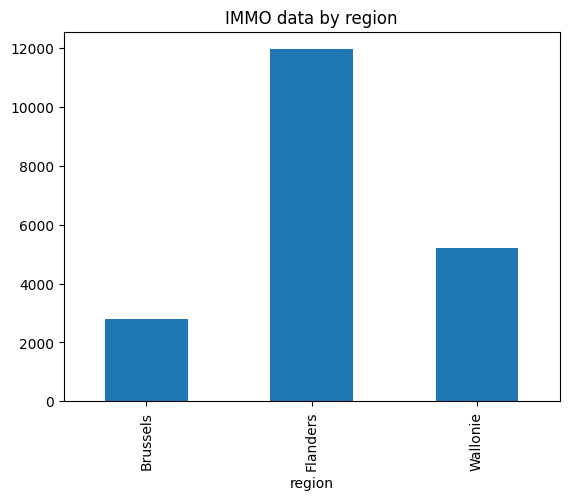

<Figure size 640x480 with 0 Axes>

In [39]:
data_by_region = df.groupby(["region"])["type"].count()
display(data_by_region)
data_by_region.plot(kind="bar", title="IMMO data by region")
plt.show()
plt.clf()

region    province       
Brussels  Brussels           2799
Flanders  Antwerp            3320
          East Flanders      2840
          Flemish Brabant    1483
          Limburg             800
          West Flanders      3521
Wallonie  Hainaut            1779
          Liège              1406
          Luxembourg          463
          Namur               745
          Walloon Brabant     821
Name: type, dtype: int64

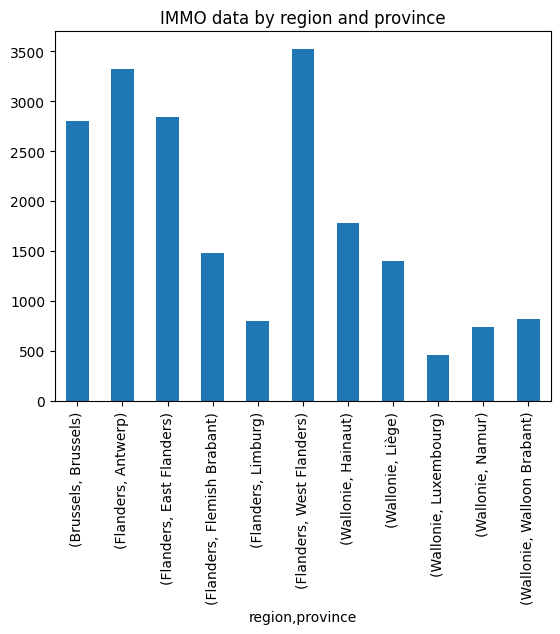

<Figure size 640x480 with 0 Axes>

In [40]:
data_by_region_province = df.groupby(["region", "province"])["type"].count()
display(data_by_region_province)
data_by_region_province.plot(kind="bar", title="IMMO data by region and province")
plt.show()
plt.clf()

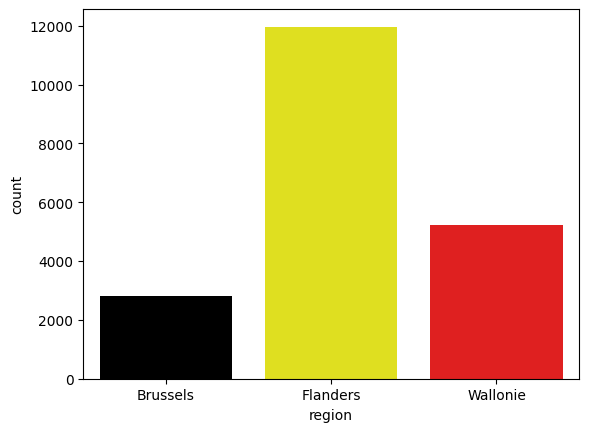

<Figure size 640x480 with 0 Axes>

In [57]:
regions = ["Brussels", "Flanders", "Wallonie"]
#provinces = ["Brussels", "Antwerp", "", "", "", "", "Hainaut", "", "", "", ""]
sns.countplot(x="region", order=regions, palette=["black","yellow","red"], data=df)
#sns.countplot(x="province", data=df)
plt.show()
plt.clf()